In [266]:
import networkx as nx
import numpy as np
import itertools as it
import random
import time
import scipy
import fresnel
import os
import PIL
import glob

from matplotlib import pyplot as plt

In [138]:
def coordination_pattern(x,basis,include_center=False):
    """
    To do: obtain the neighbors of an input atom position
    Args:
        x: the position of atoms
        basis: the relative position to the center atom x
    Returns:
        the neighbors of the atoms, excluding the center atoms
    """
    x=np.array(x)
    if include_center==True:
        temp=(x.reshape(-1,1,3)+basis).reshape(-1,3)
        return np.around(np.vstack((x,temp)),7)
    else:
        return np.around((x.reshape(-1,1,3)+basis).reshape(-1,3),7)

In [163]:
def plot_pair_coord():
    Au_to_Au_coor_distribution = []
    for i in range(12):
        Au_to_Au_coor_distribution.append(sum(surface_Au[:,3] == i))

    Au_to_Ag_coor_distribution = []
    for i in range(12):
        Au_to_Ag_coor_distribution.append(sum(surface_Au[:,4] == i))

    f=plt.figure()
    plt.plot(Au_to_Au_coor_distribution,c="r",label="Au_with_Au")
    plt.plot(Au_to_Ag_coor_distribution,c="black",label="Au_with_Ag")
    plt.legend()

    Ag_to_Au_coor_distribution = []
    for i in range(12):
        Ag_to_Au_coor_distribution.append(sum(surface_Ag[:,3] == i))

    Ag_to_Ag_coor_distribution = []
    for i in range(12):
        Ag_to_Ag_coor_distribution.append(sum(surface_Ag[:,4] == i))
    
    f=plt.figure()
    plt.plot(Ag_to_Au_coor_distribution,c="r",label="Ag_with_Au")
    plt.plot(Ag_to_Ag_coor_distribution,c="black",label="Ag_with_Ag")
    plt.legend()

In [313]:
def read_in_structure_and_plot():
    step=1000000
    Au_data=np.loadtxt(working_directory+"structure/"+"Au_data_{}.csv".format(step),delimiter=",").reshape(-1,5)
    Ag_data=np.loadtxt(working_directory+"structure/"+"Ag_data_{}.csv".format(step),delimiter=",").reshape(-1,5)

    cpu_limit = fresnel.Device(mode='cpu', n=10)

    data = np.vstack((Au_data,Ag_data))

    data = data[:,0:3]

    scene = fresnel.Scene(device=cpu_limit)

    geometry1 = fresnel.geometry.Sphere(scene, N=len(data), radius=np.sqrt(2)/4)

    geometry1.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                                  roughness=0.8)
    geometry1.position[:] = data
    geometry1.material.primitive_color_mix = 1.0

    geometry1.color[0:len(Au_data)] = fresnel.color.linear([1,1,0])
    geometry1.color[len(Au_data):len(data)] = fresnel.color.linear([0.25,0.5,0.9])
    
    out=fresnel.preview(scene)
    image = PIL.Image.fromarray(out[:], mode='RGBA')
    display(image)
    image.close()
    
    surface_Au = Au_data[(Au_data[:,3]+Au_data[:,4])<12]
    if len(Ag_data)>0:
        surface_Ag = Ag_data[(Ag_data[:,3]+Ag_data[:,4])<12]
    else:
        surface_Ag=[]
    return Au_data,Ag_data,surface_Au,surface_Ag,image

In [314]:
basis=np.array([np.array([0.5,0.5,0]),
                     np.array([-0.5,0.5,0]),
                     np.array([0.5,-0.5,0]),
                     np.array([-0.5,-0.5,0]),
                     np.array([0.5,0,0.5]),
                     np.array([0.5,0,-0.5]),
                     np.array([-0.5,0,0.5]),
                     np.array([-0.5,0,-0.5]),
                     np.array([0,0.5,0.5]),
                     np.array([0,-0.5,0.5]),
                     np.array([0,0.5,-0.5]),
                     np.array([0,-0.5,-0.5]),
                    ])
basis=np.around(basis,7)

In [342]:
repo_directory="/mnt/orkney/Chemobot/Nanobot-Monte_Carlo_Simulation/Au_Ag_5/data/plots_1000000_summary/Growth_shape_3/"
example_names=glob.glob(repo_directory+"example*_Mathematica.png")

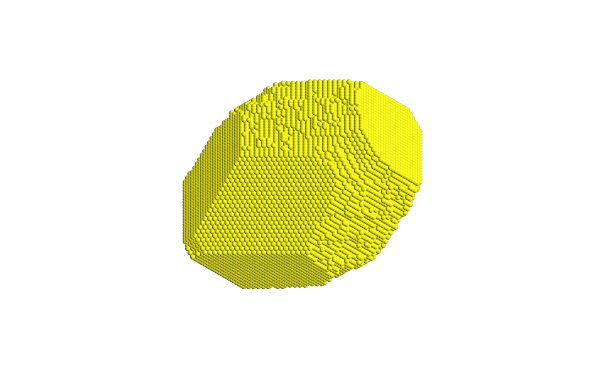

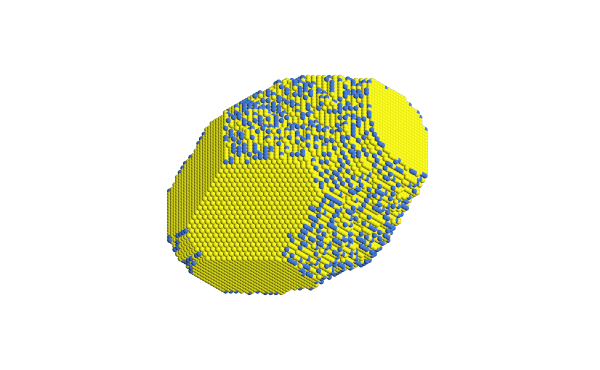

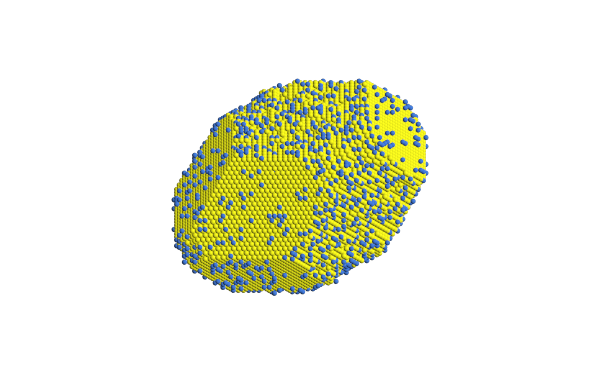

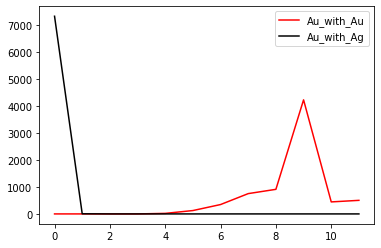

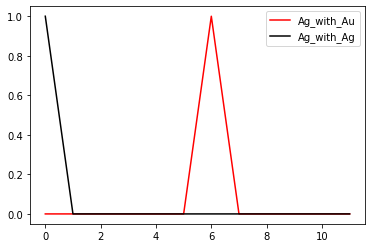

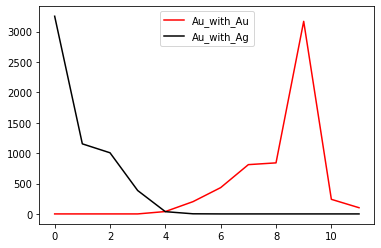

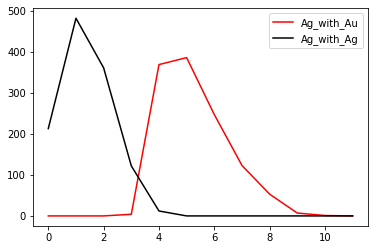

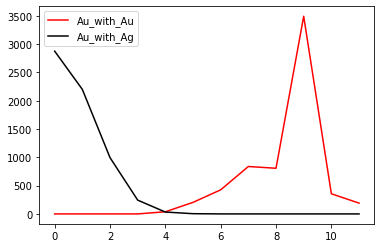

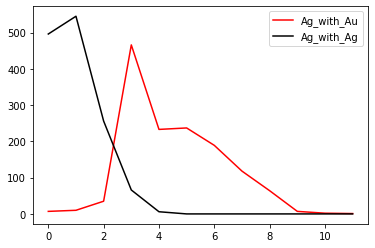

In [343]:
images=[]
for index in range(len(example_names)):
    working_directory="/mnt/orkney/Chemobot/Nanobot-Monte_Carlo_Simulation/Au_Ag_5/example_{}_{}_{}_{}_{}/".format(*example_names[index].split("_")[-6:-1])
    Au_data,Ag_data,surface_Au,surface_Ag,image=read_in_structure_and_plot()
    plot_pair_coord()